# London's underground resilience with weight of flow


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from networkx import algorithms 
from networkx.algorithms import efficiency
from networkx.algorithms import components
from networkx.algorithms.efficiency_measures import global_efficiency
from networkx.algorithms.components import connected_components

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

## II.Flows: weighted network

In this section, you will include passengers into the underground, and assess whether different measures need to be used when flows are considered. The network to use in this section is the weighted network given to you in the coursework, where the flows of passengers were assigned to the links between stations.

### 1. Constructing the networks

In [3]:
#OK, let us start with the graphml file for London's underground
G = nx.read_graphml('london.graph')

In [4]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [5]:
station_name = list(G.nodes)
for node in station_name:
    G.nodes[node]['station_name'] = node

In [6]:
# we can also add the stations name to the edge attributes from the nodes attributes:

nod_name1={(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2={(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G,nod_name1,'station_1_')
nx.set_edge_attributes(G,nod_name2,'station_2_')

In [7]:
 #check  dataframe from the graph 
df = nx.to_pandas_edgelist(G)
df.head()

,source,target,station_2_,flows,length,station_1_,line_name
0,Wembley Park,Kingsbury,Kingsbury,12356,2916.771558,Wembley Park,Jubilee
1,Wembley Park,Neasden,Neasden,6744,2353.165938,Wembley Park,Jubilee
2,Wembley Park,Preston Road,Preston Road,36601,1419.735166,Wembley Park,Metropolitan
3,Wembley Park,Finchley Road,Finchley Road,55216,7266.373927,Wembley Park,Metropolitan
4,Kingsbury,Queensbury,Queensbury,9419,1245.995234,Kingsbury,Jubilee


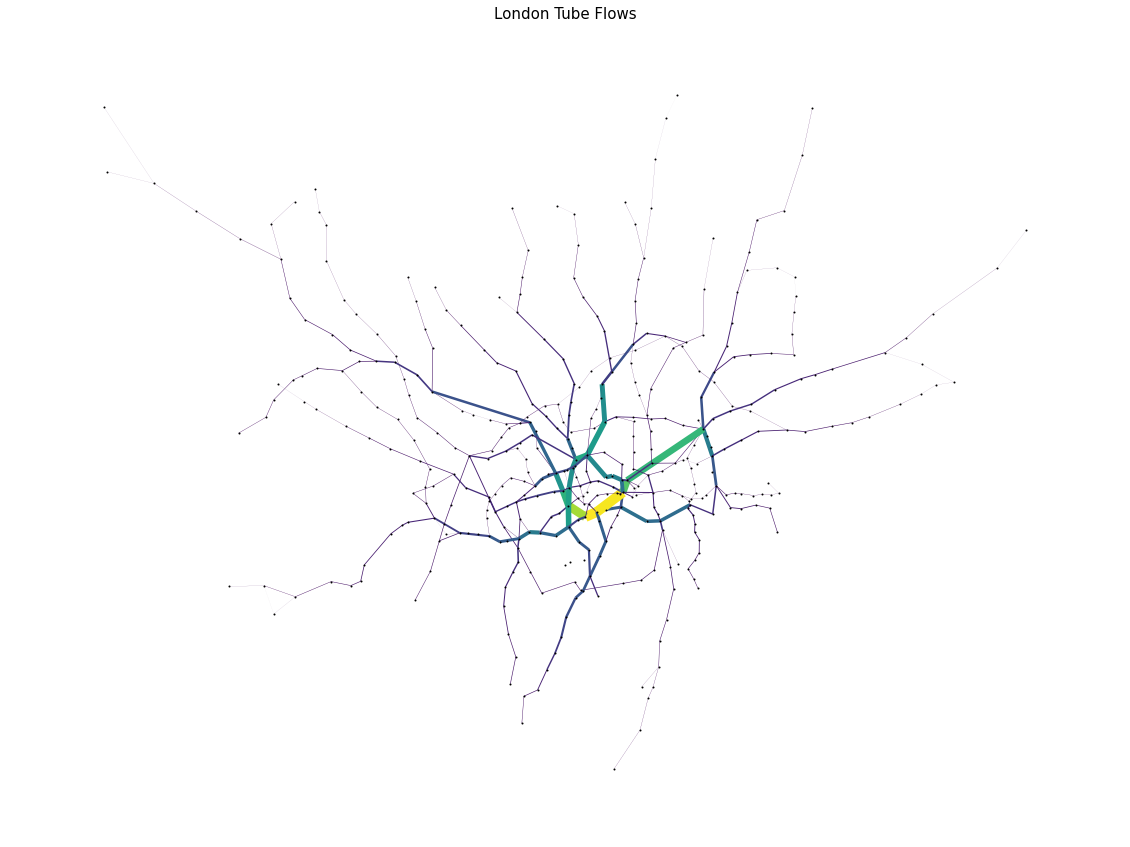

In [8]:
# Lets set colour and size of nodes according to the flows_
weights = [w for e1,e2,w in G.edges(data='flows')]

weights_color=[(w/max(weights)) for e1,e2,w in G.edges(data='flows')]
weights_size=[(w/max(weights)*10) for e1,e2,w in G.edges(data='flows')]

# Plot graph
fig, ax = plt.subplots(figsize=(20,15))

pos = {e1: xy for e1,xy in G.nodes(data='coords')}

edg=nx.draw_networkx_edges(G, pos,edge_color=weights_color, width=weights_size)

nx.draw_networkx_nodes(G,pos = pos,node_color= 'black',node_size= 1)
plt.axis("off")
plt.title("London Tube Flows",fontsize=15)
plt.show()

#this are the directed flows in the tube network!

## 3.  Centrality measures

In [9]:
G_un=G.to_undirected()

In [10]:
new_weight={}

for e1,e2,c in G_un.edges(data='flows'):
    if c==0:
        new_weight[(e1,e2)]=0
    else:
        new_weight[(e1,e2)]=1/c

nx.set_edge_attributes(G_un,new_weight,'new_weight')

nx.to_pandas_edgelist(G_un)

,source,target,station_2_,flows,length,new_weight,station_1_,line_name
0,Wembley Park,Kingsbury,Kingsbury,12356,2916.771558,0.000081,Wembley Park,Jubilee
1,Wembley Park,Neasden,Neasden,6744,2353.165938,0.000148,Wembley Park,Jubilee
2,Wembley Park,Preston Road,Preston Road,36601,1419.735166,0.000027,Wembley Park,Metropolitan
3,Wembley Park,Finchley Road,Finchley Road,55216,7266.373927,0.000018,Wembley Park,Metropolitan
4,Kingsbury,Queensbury,Queensbury,9419,1245.995234,0.000106,Kingsbury,Jubilee
...,...,...,...,...,...,...,...,...
462,Hounslow Central,Hounslow East,Hounslow East,13469,745.684383,0.000074,Hounslow Central,Piccadilly
463,Hounslow East,Osterley,Osterley,15935,967.494672,0.000063,Hounslow East,Piccadilly
464,Osterley,Boston Manor,Boston Manor,17445,2560.814291,0.000057,Osterley,Piccadilly
465,Boston Manor,Northfields,Northfields,18598,930.852145,0.000054,Boston Manor,Piccadilly


### weighted network 带有加权的网络

In [11]:
bet_london_w=nx.betweenness_centrality(G_un, weight='new_weight', normalized=False)
nx.set_node_attributes(G_un,bet_london_w,'betweenness_w')

# non-seq
betweenness_df=pd.DataFrame.from_dict(bet_london_w,columns=['betweenness_w'],orient='index')
max_1=list(betweenness_df.sort_values('betweenness_w',axis = 0,ascending = False).index)[0:10]

max_1

['Green Park',
 'Bank and Monument',
 'Waterloo',
 'Westminster',
 'Liverpool Street',
 'Stratford',
 'Bond Street',
 'Euston',
 'Oxford Circus',
 'Warren Street']

In [12]:
# max_1 seq

max_2=[]
g_1=G_un.copy()

for i in range(0,10):
    # recalculate the centrality values and remove the most largest one
    betweenness_centrality=nx.betweenness_centrality(g_1, weight='new_weight',normalized=False)
    nx.set_node_attributes(g_1,betweenness_centrality,'betweenness_centrality')
    betweenness_df=pd.DataFrame.from_dict(betweenness_centrality,columns=['betweenness_centrality'],orient='index')
    node1=list(betweenness_df.sort_values('betweenness_centrality',axis = 0,ascending = False).index)
    max_2.append(node1[0])
    g_1.remove_nodes_from([node1[0]])

max_2

['Green Park',
 'Bank and Monument',
 "King's Cross St. Pancras",
 'Canada Water',
 'Finchley Road',
 'Highbury & Islington',
 'Blackhorse Road',
 "Earl's Court",
 'Willesden Junction',
 "Shepherd's Bush"]

#### 无加权网络

In [13]:
betweenness_centrality=nx.betweenness_centrality(G, normalized=False)
# add these values to the nodes attributes:
nx.set_node_attributes(G,betweenness_centrality,'betweenness_centrality')

In [14]:
betweenness_df=pd.DataFrame.from_dict(betweenness_centrality,columns=['betweenness_centrality'],orient='index')
max_3=list(betweenness_df.sort_values('betweenness_centrality',axis = 0,ascending = False).index)[0:10]

betweenness_df.sort_values('betweenness_centrality',axis = 0,ascending = False)
max_3

['Stratford',
 'Bank and Monument',
 'Liverpool Street',
 "King's Cross St. Pancras",
 'Waterloo',
 'Green Park',
 'Euston',
 'Westminster',
 'Baker Street',
 'Finchley Road']

In [15]:
# max5

max_5=[]
g_5=G.copy()

for i in range(0,10):
    # recalculate the centrality values and remove the most largest one
    betweenness_centrality=nx.betweenness_centrality(g_5, normalized=False)
    nx.set_node_attributes(g_5,betweenness_centrality,'betweenness_centrality')
    betweenness_df=pd.DataFrame.from_dict(betweenness_centrality,columns=['betweenness_centrality'],orient='index')
    node5=list(betweenness_df.sort_values('betweenness_centrality',axis = 0,ascending = False).index)
    max_5.append(node5[0])
    g_5.remove_nodes_from([node5[0]])

max_5

['Stratford',
 "King's Cross St. Pancras",
 'Waterloo',
 'Bank and Monument',
 'Canada Water',
 'West Hampstead',
 "Earl's Court",
 "Shepherd's Bush",
 'Euston',
 'Baker Street']

In [16]:
#create a df to store the results of top ten important stations of London underground system
top_node=pd.DataFrame(index=range(0,10),columns=['Weighted Betweenness(seq)','Weighted Betweenness(non-seq)','Betweenness(non-seq)','Betweenness(seq)'])

In [17]:
columns=['Weighted Betweenness(seq)','Weighted Betweenness(non-seq)','Betweenness(non-seq)','Betweenness(seq)']
max_all=[max_2,max_1,max_3,max_5]
for i in range(0,4):
    for j in range(0,10):
        top_node[columns[i]][j]=G.nodes[max_all[i][j]]['station_name']
top_node.insert(0,'Rank',range(1,11))

In [18]:
top_node.to_csv('w_network.csv')

### choose two strategies to evaluate the resilience of London's underground

我们将会移除加权和无加权网络的最高的站点，计算移除之后的影响

In [19]:
# average_shortest_path_length function
def shortest_path_length(G2):
    '''
    This function is the second method to evaluate the impact on the network after nodes removal.
    It gets the value of relative size of the maximal connected sub-graph.
    '''
    # Get the list of components:
    components = nx.connected_components(G2)
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    Largest_subgraph = G2.subgraph(largest_component)
    size = nx.average_shortest_path_length(Largest_subgraph)
    
    return size

In [21]:
# average_shortest_path_length function
def shortest_path_length_weight(G2):
    '''
    This function is the second method to evaluate the impact on the network after nodes removal.
    It gets the value of relative size of the maximal connected sub-graph.
    '''
    # Get the list of components:
    components = nx.connected_components(G2)
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    Largest_subgraph = G2.subgraph(largest_component)
    size = nx.average_shortest_path_length(Largest_subgraph,weight='new_weight')
    
    return size

In [49]:
len(g_1)

400

In [48]:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
betweenness_df=pd.DataFrame.from_dict(bet_london_t,columns=['betweenness_t'],orient='index')
node1=list(betweenness_df.sort_values('betweenness_t',axis = 0,ascending = False).index)

#create a list to store the score after every time removal
clustering_1=[]
path_length_1=[]
g_1=G.copy()

#remove the node one by one, after every removel, calculate the score
for i in range(0,1):
    clustering_1.append(nx.average_clustering(g_1))
    path_length_1.append(shortest_path_length_weight(g_1))
    g_1.remove_nodes_from([node1[i]])

In [24]:
path_length_1

[13.545997506234414, 14.496447069006436]

In [23]:
clustering_1

[0.030382377389858693, 0.030625000000000003]

In [50]:
# betweenness non-seq
bet_london_w=nx.betweenness_centrality(G_un,weight='new_weight', normalized=False)
betweenness_df=pd.DataFrame.from_dict(bet_london_w,columns=['betweenness_w'],orient='index')
node2=list(betweenness_df.sort_values('betweenness_w',axis = 0,ascending = False).index)
clustering_2=[]
path_length_2=[]
g_2=G_un.copy()
for i in range(0,1):
    clustering_2.append(nx.average_clustering(g_2,weight='new_weight'))
    path_length_2.append(shortest_path_length_weight(g_2))
    g_2.remove_nodes_from([node2[i]])

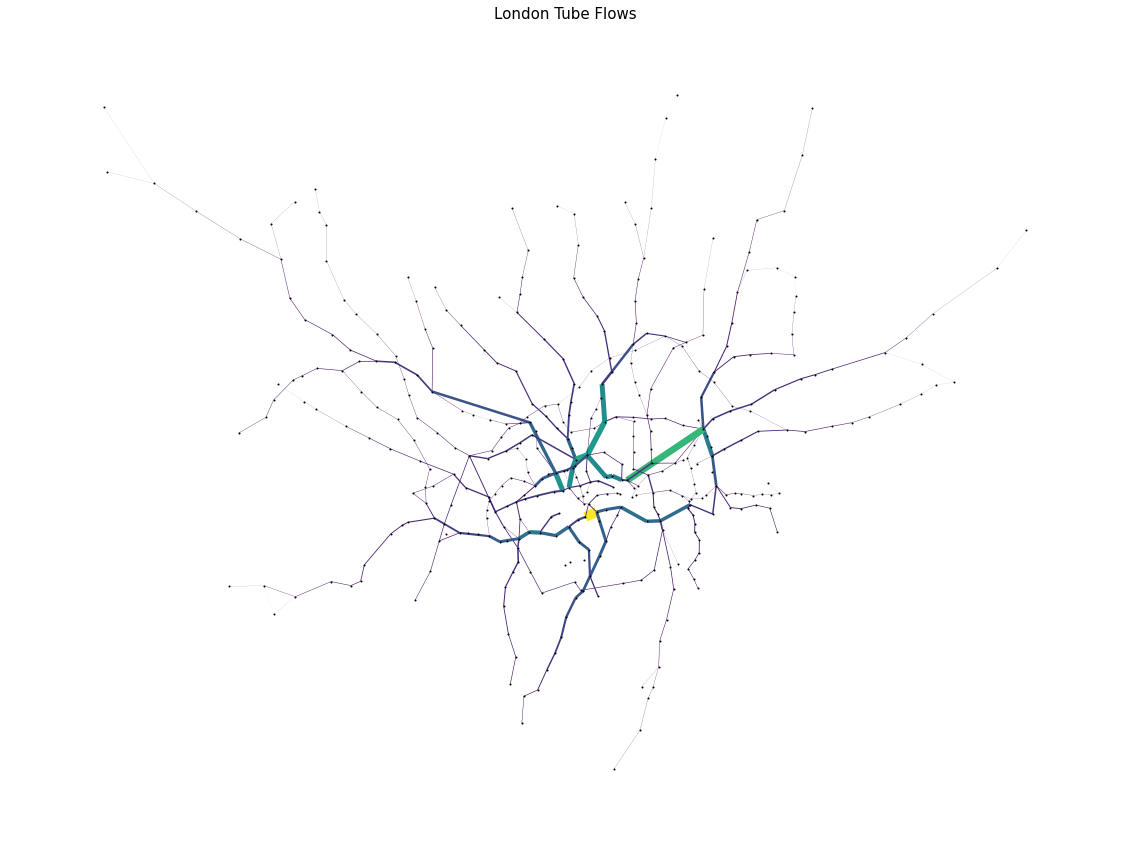

In [40]:
# Lets set colour and size of nodes according to the flows_
weights = [w for e1,e2,w in g_2.edges(data='flows')]

weights_color=[(w/max(weights)) for e1,e2,w in g_2.edges(data='flows')]
weights_size=[(w/max(weights)*10) for e1,e2,w in g_2.edges(data='flows')]
# Plot graph
fig, ax = plt.subplots(figsize=(20,15))

pos = {e1: xy for e1,xy in g_2.nodes(data='coords')}

edg=nx.draw_networkx_edges(g_2, pos,edge_color=weights_color, width=weights_size)

nx.draw_networkx_nodes(g_2,pos = pos,node_color= 'black',node_size= 1)
plt.axis("off")
plt.title("London Tube Flows",fontsize=15)
plt.show()

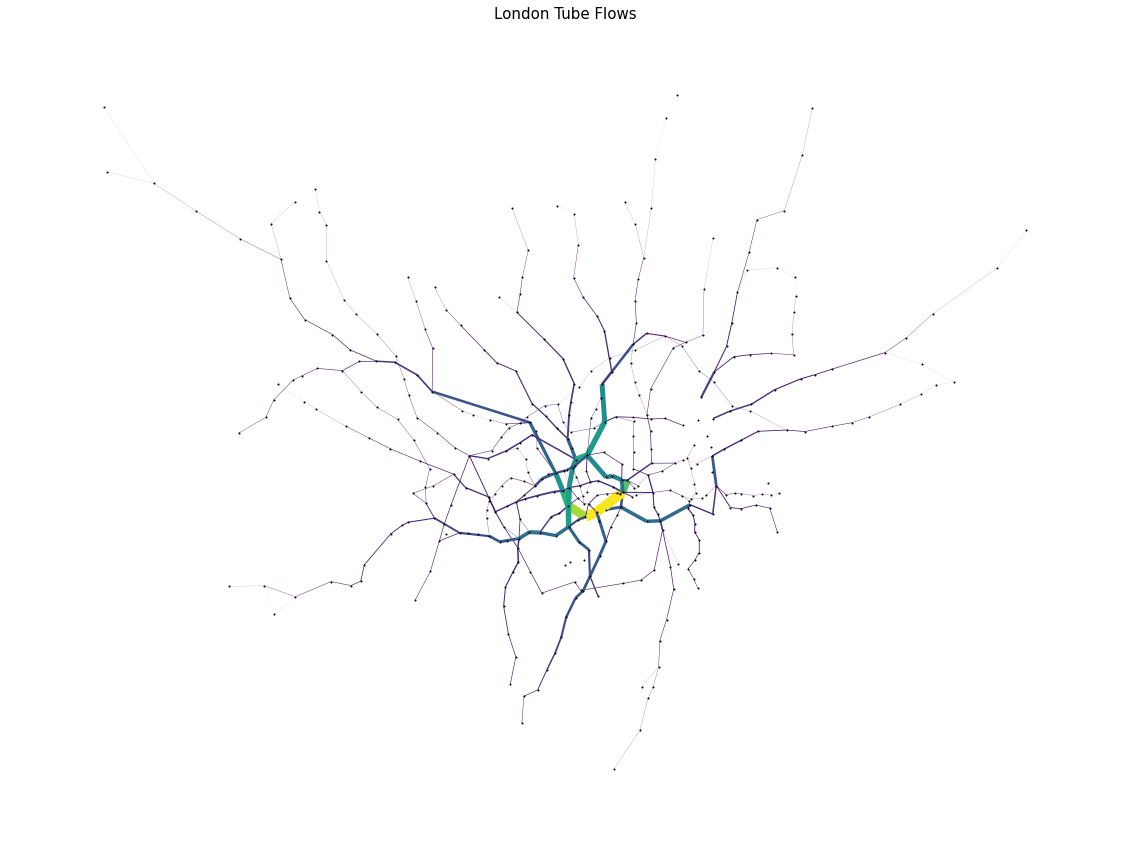

In [51]:
# Lets set colour and size of nodes according to the flows_
weights = [w for e1,e2,w in g_1.edges(data='flows')]

weights_color=[(w/max(weights)) for e1,e2,w in g_1.edges(data='flows')]
weights_size=[(w/max(weights)*10) for e1,e2,w in g_1.edges(data='flows')]
# Plot graph
fig, ax = plt.subplots(figsize=(20,15))

pos = {e1: xy for e1,xy in g_1.nodes(data='coords')}

edg=nx.draw_networkx_edges(g_1, pos,edge_color=weights_color, width=weights_size)

nx.draw_networkx_nodes(g_1,pos = pos,node_color= 'black',node_size= 1)
plt.axis("off")
plt.title("London Tube Flows",fontsize=15)
plt.show()

In [27]:
clustering_2

[0.0007039644327347355, 0.0007097320560304236]

In [33]:
clustering_1

[0.030382377389858693, 0.030625000000000003]

In [34]:
path_length_1

[13.545997506234414, 14.496447069006436]

In [28]:
path_length_2

[0.0008114911860398989, 0.0008391467961624454]

In [29]:
print(str((clustering_1[0]-clustering_1[1])/clustering_1[0]*100)+'%')

-0.7985636114910979%


In [30]:
print(str((clustering_2[0]-clustering_2[1])/clustering_2[0]*100)+'%')

-0.8193060654047915%


In [31]:
print(str((path_length_1[0]-path_length_1[1])/path_length_1[0]*100)+'%')

-7.0164604883072395%


In [32]:
print(str((path_length_2[0]-path_length_2[1])/path_length_2[0]*100)+'%')

-3.4079988295999453%


In [35]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))